<html>
    <head>
        <title>Práctica Final: Matemática Aplicada a la Tecnología de la Información</title>
    
        
       
</html>

<html>
    
   <h1><center>Práctica Final - Matemática Aplicada a la Tecnología de la Información</center></h1>
   
</html>

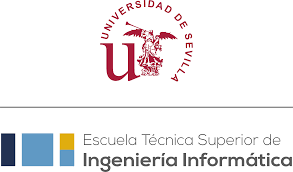

<html>
    
   <h1><u><center>Miembros del grupo</center></u></h1>
   
   <h2><center>Antonio Cabello Linares</center></h2>
   <h2><center>Nuria Escamilla Torres</center></h2>
   <h2><center>José Ramón Pérez Trigos</center></h2>
   <h2><center>Christian Asuero Carrellán</center></h2>
   
</html>

<html>
    
   <h3>
    <center>Introducción</center></h3>
   
</html>

- En esta sesión nos marcamos como principal objetivo fundamental repasar algunos conceptos estudiados de Matemática Discreta, así como nuevos conceptos de la actual asignatura.
    


- La práctica está diseñada de forma guiada, además de algunos ejemplos mostrados para
la resolución posterior de la misma y su fácil comprensión. A continuación, se
dispone de varios ejercicios propuestos sobre un grafo principal, que trata
sobre **redes multicast**.

- **La práctica presenta los siguientes apartados correspondientes a cada ejercicio:**

<html>

   <b><p style = "color:blue;">1) Algoritmos Kruskal, Dijkstra, y Kernighan-Lin.</b></color></p>
    
</html>

<html>

   <b><p style = "color:blue;">2) Coloración de aristas y vertices, propiedades.</b></color></p>
    
</html>

<html>

   <b><p style = "color:blue;">3) Transitividades y agrupamiento local.</b></color></p>
    
</html>

<html>

   <b><p style = "color:blue;">4) Euleriano / Hamiltoniano, Conectividades, Dominación.</b></color></p>
    
</html>

<html>
    
   <h2><center>Teoría y Ejemplos</center></h2>
   
</html>

<html>

   <h3><center>Tomaremos como partida un ejemplo de grafo.</center></h3>
    
</html>

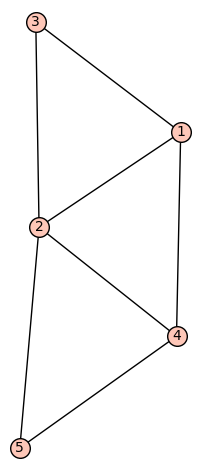

In [13]:
#Creamos el grafo.

G_Ejemplos = Graph({1:[2,3,4],2:[3,4,5],4:[5]}) 
G_Ejemplos.plot()

# 1) Algoritmos Kruskal, Dijkstra, y Kernighan-Lin.

El algoritmo de Kruskal viene a representar un árbol recubridor de peso mínimo, de manera que la información llegue a todos los nodos por los enlaces más cortos y, el algoritmo de Dijkstra viene a resolver el problema del camino mínimo. Un camimo mínimo es un árbol recubridor utilizado para la búsqueda de camino de peso mínimo de aristas.

En el **algoritmo de Kruskal**, lo primero que tenemos que cerciorarnos es de que el grafo sea conexo y funciona de la siguiente manera:

   - Se crea un bosque B (un conjunto de árboles), donde cada vértice del grafo es un árbol separado.
   - Se crea un conjunto C que contenga a todas las aristas del grafo.
   - Mientras C es no vacío:
        - Eliminar una arista de peso mínimo de C.
        - Si esa arista conecta dos árboles diferentes se añade al bosque, combinando los dos árboles en un solo árbol.
        - En caso contario, se desecha la arista.
    
Al final, el bosque tendrá una sola componente, el cuál formará un árbol de expansión mínimo del grafo.

In [169]:
def arbol_bfs(digrafo,vertice):
    '''
    (T,l)=arbol_bfs(digrafo,vertice) devuelve el árbol BFS del "digrafo" con raíz 
    en "vertice" y la lista ordenada de vértices visitados.   
    Si quisieras obtener el bfs de un grafo simple G, antes habrás de convertirlo 
    en digrafo con la orden G.to_directed()
    '''
       
    visitado=[False for i in range(digrafo.order())]
    vertices_bfs=[]
    aristas_bfs=[]
    cola=[]
    
    vertices_bfs.append(vertice)
    cola.append(vertice)
    indice=digrafo.vertices().index(vertice)
    visitado[indice]=True
    while len(cola)>0:
        x=cola[0]
        for i in sorted(digrafo.neighbors_out(x)):
            indice=digrafo.vertices().index(i)
            if not visitado[indice]:
                cola.append(i)
                visitado[indice]=True
                vertices_bfs.append(i)
                aristas_bfs.append((x,i))
        cola.remove(x)
    
    arbolbfs=DiGraph()
    arbolbfs.add_vertices(vertices_bfs)
    arbolbfs.add_edges(aristas_bfs)  
    return (arbolbfs,vertices_bfs)

In [170]:
def Kruskal(grafo):
    
    
    if not grafo.is_connected():
        #Si el grafo no es conexo lo advierte.
        print ("Lo siento. El grafo no es conexo.")
        return (Graph(),0)
    else:
        if not grafo.weighted():
            #Si el grafo no es ponderado lo convierte a ponderado
            #con las aristas de peso=1
            grafo.weighted(True)
            for a in grafo.edges():
                grafo.set_edge_label(a[0],a[1],1)
    
        funcion_peso = lambda e: grafo.edge_label(e[0],e[1])
        aristas=grafo.min_spanning_tree(weight_function=funcion_peso)
        recubridor=Graph()
        recubridor.weighted(True)
        recubridor.add_edges(aristas)
        
        #Colocamos el peso de las aristas del árbol recubridor
        for a in recubridor.edges():
            recubridor.set_edge_label(a[0],a[1],grafo.edge_label(a[0],a[1]))
    
        #Sumamos el peso del árbol
        peso=0
        for b in recubridor.edges():
            peso+=recubridor.edge_label(b[0],b[1])
    
        return (recubridor,peso)

**Ejemplo del Algoritmo Kruskal**

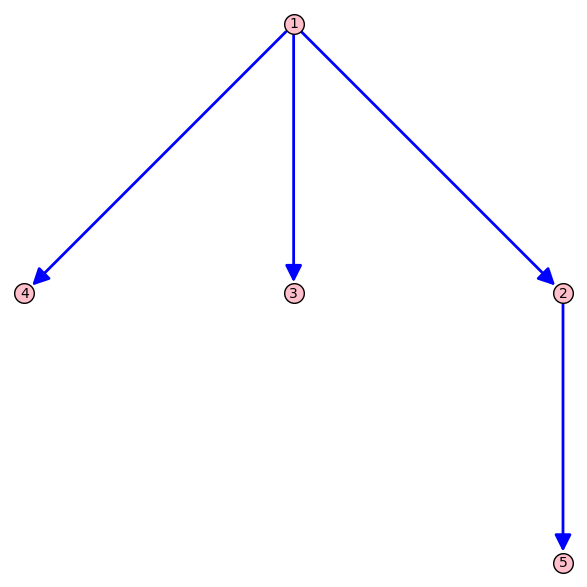

In [297]:
#Lo hacemos dirigido y mostramos el grafo convertido a árbol, partiendo del vértice 1:

G_K = G_Ejemplos.to_directed()

(BFS, lista) = arbol_bfs(G_K, 1)

BFS.plot(figsize=9, layout='tree', vertex_color = 'pink', edge_color = 'blue')

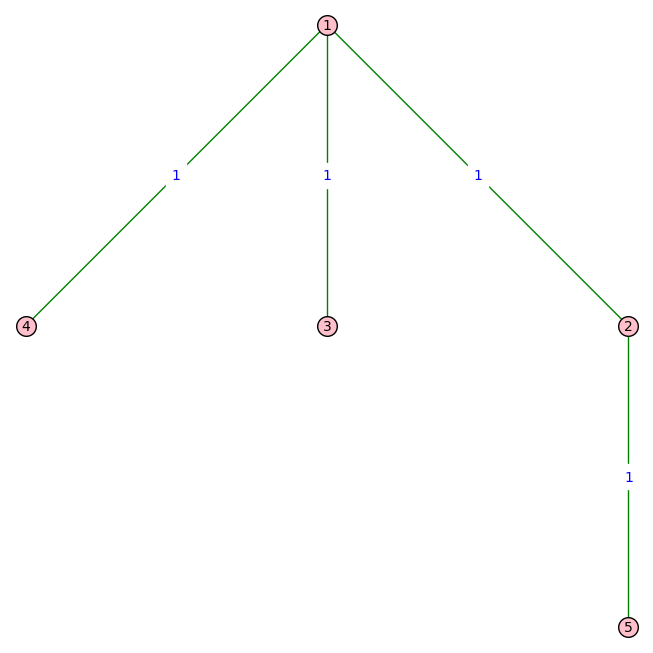

In [298]:
(K,p) = Kruskal(G_K)

K.plot(layout='tree', edge_labels=True, figsize=10, vertex_color = 'pink', edge_color = 'green')

En el algoritmo de **Dijkstra** Se parte de un vértice inicial s a un vértice final t, y tenemos que comprobar que todas las aristas tengan un peso ponderado positivo, cuya suma tiene que ser la menor posible.

El funcionamiento del **Algoritmo Dijkstra** es el siguiente:

   - En cada iteración a cada vértice v ∈ V se le asignan dos etiquetas que pueden ser temporales o permanentes (&,P):
        - La etiqueta & es una estimación de la longitud del camino mínimo desde el vértice inicial hasta el actual.
        - La etiqueta P es una estimación del predecesor del vértice v en dicho camino.

In [175]:
def Djkstra(G,s):
    
    #Si G no es ponderado poner peso 1 a las aristas
    if not G.weighted():
        G.weighted(True)
        for a in G.edges():
            G.set_edge_label(a[0],a[1],1)
    
    #Controlar si G es conexo
    if not G.is_connected():
        print ("El grafo no es conexo.")
        print ("Se obtendrá el árbol de camino mínimo de la componente conexa del vértice ")
    
    cc=G.connected_component_containing_vertex(s)
    vtodos=G.vertices()
  
    
    n=G.order()
    Padres=[[] for _ in range(n)] #Inicializar padres de los vértices
    D=[1000000000 for _ in range(n)] #Etiquetas igual a "infinito"

    inds=vtodos.index(s)
    D[inds]=0
    Q=set(cc)
    while len(Q)>0:
        #Buscamos el vértice de Q con menor etiqueta
        v=None
        low=1000000000
        for u in Q:
            indu=vtodos.index(u)
            if D[indu]<low:
                v=u
                low=D[indu]
        #Actualizamos etiquetas
        indv=vtodos.index(v)
        Q.remove(v)
        Adj=set(G.neighbors(v))
        for u in Adj.intersection(Q):
            larista=G.edge_label(v,u)
            indu=vtodos.index(u)
            if D[indu]>D[indv]+larista:
                D[indu]=D[indv]+larista
                Padres[indu]=[v]
    P={}  #Dicionario con los padres de cada vértice
    for u in cc:
        indu=vtodos.index(u)
        P.setdefault(u,Padres[indu])             
    T=Graph(P) #Árbol de camino mínimo
    T.weighted(True)
    for a in T.edges():
        T.set_edge_label(a[0],a[1],G.edge_label(a[0],a[1]))
    
    return D,T

**Ejemplo del Algoritmo Dijkstra**

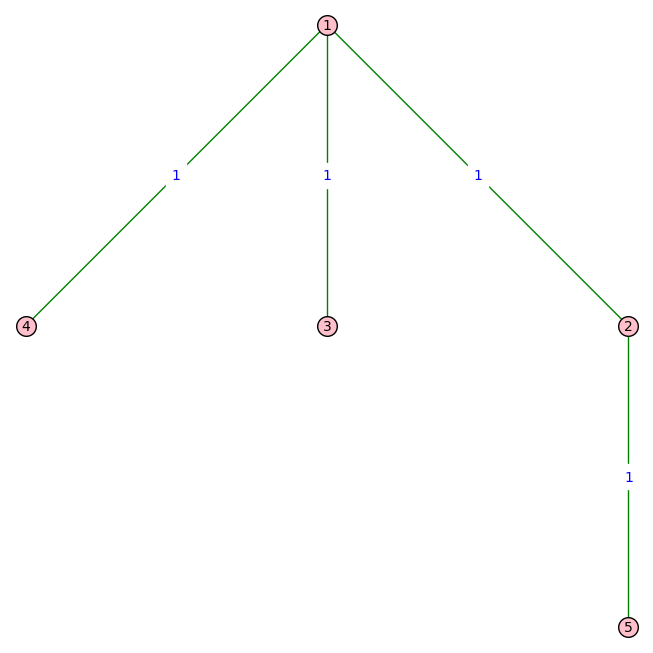

El camino más corto para ir del router 2 al router 4 es:  [[2, 1, 4]]


In [302]:
(D, DJ) = Djkstra(G_K , 1)

DJ.show(layout='tree', edge_labels=True, figsize=10, vertex_color = 'pink', edge_color = 'green')

print("El camino más corto para ir del router 2 al router 4 es: ", DJ.all_paths(2, 4))

La entrada del **Algoritmo Kernighan-Lin** es un grafo no dirigido G = (V, E) con conjunto de vértices V, 
conjunto de aristas E, y (opcionalmente) pesos numéricos en los bordes en E. El objetivo del algoritmo es 
la partición V en dos subconjuntos disjuntos A y B de igual (o casi igual) tamaño, de una manera que minimiza la suma T 
de los pesos del subconjunto de aristas que cruzada de A a B. Si el grafo no está ponderado, 
entonces el objetivo es **minimizar** el número de bordes cruzados, esto equivale a asignar un peso a cada borde. 
El algoritmo mantiene y mejora una partición, en cada paso utilizando un algoritmo codicioso para emparejar los vértices de A con los vértices de B.

**Ejemplo del algoritmo Kernighan-Lin**

In [183]:
import networkx

In [184]:
# Cálculo de la conectividad algebraica de todo el grafo:
L2 = {i: G_Ejemplos.neighbors(i) for i in G_Ejemplos}

GA = networkx.Graph(L2)

conect = networkx.algebraic_connectivity(GA, method='tracemin_lu' ) #conectividad entre todos los vecinos

In [185]:
# Ahora, el autovector asociado

V = networkx.fiedler_vector(GA, weight='weight', normalized=False, tol=1e-08, method='tracemin_pcg', seed=None)


In [186]:
# Para el siguiente paso necesitamos el algoritmo de Kernighan-Lin
from itertools import count

import networkx as nx
from networkx.algorithms.community.community_utils import is_partition
from networkx.utils import BinaryHeap, not_implemented_for, py_random_state

__all__ = ["kernighan_lin_bisection"]


def _kernighan_lin_sweep(edges, side):
    """
    This is a modified form of Kernighan-Lin, which moves single nodes at a
    time, alternating between sides to keep the bisection balanced.  We keep
    two min-heaps of swap costs to make optimal-next-move selection fast.
    """
    costs0, costs1 = costs = BinaryHeap(), BinaryHeap()
    for u, side_u, edges_u in zip(count(), side, edges):
        cost_u = sum(w if side[v] else -w for v, w in edges_u)
        costs[side_u].insert(u, cost_u if side_u else -cost_u)

    def _update_costs(costs_x, x):
        for y, w in edges[x]:
            costs_y = costs[side[y]]
            cost_y = costs_y.get(y)
            if cost_y is not None:
                cost_y += 2 * (-w if costs_x is costs_y else w)
                costs_y.insert(y, cost_y, True)

    i = 0
    totcost = 0
    while costs0 and costs1:
        u, cost_u = costs0.pop()
        _update_costs(costs0, u)
        v, cost_v = costs1.pop()
        _update_costs(costs1, v)
        totcost += cost_u + cost_v
        i += 1
        yield totcost, i, (u, v)

In [188]:
# Par del algoritmo donde calculamos la bisección
@py_random_state(4)
@not_implemented_for("directed")
def kernighan_lin_bisection(GA, partition=None, max_iter=10, weight="weight", seed=None):
    n = len(GA)
    labels = list(GA)
    seed.shuffle(labels)
    index = {v: i for i, v in enumerate(labels)}

    if partition is None:
        side = [0] * (n // 2) + [1] * ((n + 1) // 2)
    else:
        try:
            A, B = partition
        except (TypeError, ValueError) as err:
            raise nx.NetworkXError("partition must be two sets") from err
        if not is_partition(GA, (A, B)):
            raise nx.NetworkXError("partition invalid")
        side = [0] * n
        for a in A:
            side[index[a]] = 1

    if GA.is_multigraph():
        edges = [
            [
                (index[u], sum(e.get(weight, 1) for e in d.values()))
                for u, d in GA[v].items()
            ]
            for v in labels
        ]
    else:
        edges = [
            [(index[u], e.get(weight, 1)) for u, e in GA[v].items()] for v in labels
        ]

    for i in range(max_iter):
        costs = list(_kernighan_lin_sweep(edges, side))
        min_cost, min_i, _ = min(costs)
        if min_cost >= 0:
            break

        for _, _, (u, v) in costs[:min_i]:
            side[u] = 1
            side[v] = 0

    A = {u for u, s in zip(labels, side) if s == 0}
    B = {u for u, s in zip(labels, side) if s == 1}
    return A, B


     

# Por último, llamada al método de la bisección

Bi = kernighan_lin_bisection(GA, partition = None, max_iter = 100, weight = None, seed = None)

print("Podemos dividir nuestra red en los conjuntos de las siguientes 2 particiones:")

show(Bi)

Podemos dividir nuestra red en los conjuntos de las siguientes 2 particiones:


({1, 3}, {2, 4, 5})

# 2) Coloración de aristas y vertices, propiedades.

Los problemas de coloreado de grafos se originaron con el coloreado de mapas. Por ejemplo, considere cada estado de los Estados Unidos como un vértice y conecte dos vértices por un borde si y solo si comparten un límite, es decir, son vecinos. Si puede colorear el mapa de Estados Unidos usando k colores de tal manera que no haya dos estados vecinos que tengan el mismo color, entonces decimos que el mapa tiene una coloración k. Mientras estudiaba en Londres a mediados del siglo XIX, el matemático sudafricano Francis Guthrie conjeturó a su profesor de matemáticas Augustus de Morgan que **cuatro colores son suficientes para colorear cualquier mapa**. Fue un problema abierto durante más de 100 años (solo probado por Appel y Haken en 1976).

**El problema de coloreado de grafos consiste en asignar colores a ciertos elementos de un grafo sujeto a ciertas restricciones.**

El número más pequeño de colores necesarios para colorear un grafo G se llama su **número cromático.**

**> Coloreado de vértices**

Dado un grafo no dirigido G = (V, E), una coloración de vértices es un etiquetado con colores de modo que no haya dos vértices que compartan un borde que tengan el mismo color. Una coloración que utiliza como máximo k colores se denomina k-coloración (propia).

El número más pequeño de colores necesarios para colorear un grafo G se llama su número cromático (vértice), y aquí se denota como **χv(G)**. Un subconjunto de V asignado al mismo color se denomina clase de color. Un subconjunto S de V se llama conjunto independiente si no hay dos vértices en S adyacentes en G. Por definición, cada clase de color forma un conjunto independiente.

In [19]:
import matplotlib
import random

def getListaColores(n):
    colors=[]
    for name, hex in matplotlib.colors.cnames.items():
        colors.append(name)
    return sample(colors, n)

**Ejemplo de coloreado de vertices**

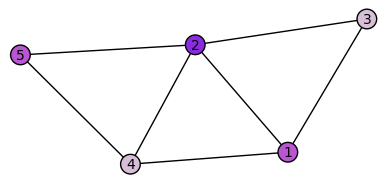

In [189]:
d = {}

vc = G_Ejemplos.coloring()

colors = getListaColores(len(vc))

for c,l in zip(colors,vc):
    
    d[c] = l
    
G_Ejemplos.show(vertex_colors = d)

**> Coloreado de aristas**

El coloreado de aristas es la aplicación directa del coloreado de vértices de un grafo G. Escribimos χv(L(G)) = **χe(G)** para el índice cromático de G. La coloración de una arista de un grafo es una asignación de colores a las aristas para que ningún vértice incida a dos aristas del mismo color.Una coloración de aristas con k colores se denomina k-coloración de aristas.

**Ejemplo de coloreado de aristas**

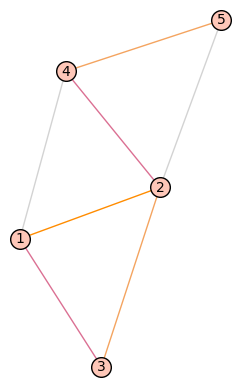

In [23]:
from sage.graphs.graph_coloring import edge_coloring

d = {}

ec = edge_coloring(G_Ejemplos)

colors = getListaColores(len(ec))

for c,l in zip(colors,ec):
    
    d[c] = l
    
G_Ejemplos.show(edge_colors = d)

**> Polinomio cromático**

El polinomio cromático se define como el único polinomio de interpolación de grado n a través de los puntos (k, PG(k)) para k = 0, 1, . . . n, donde n es el número de vértices en G.

Es la función que cuenta el número de **t-coloraciones de G**. Como su nombre lo indica, para un G dado, la función es de hecho un polinomio en t. Para un número complejo x, sea x(k) = Qk−1 i=0 (x − i).

**Ejemplo del polinomio cromático**

In [193]:

print("Polinomio del grafo de ejemplo:", G_Ejemplos.chromatic_polynomial())

Polinomio del grafo de ejemplo: x^5 - 7*x^4 + 18*x^3 - 20*x^2 + 8*x


# 3) Transitividades y agrupamiento local.

Explicaremos la **transitividad del grafo**. El concepto se refiere, a que si dados 3 vértices, u,v y w, si u está conectado con v y v está conectado con w, existe un camino de u a w de longitud 2: **u-v-w**

Definiremos el **coeficiente de agrupamiento** de un grafo, **G**, de las siguientes maneras:

1º C = N2 de caminos cerrados de longitud 2 / N2 de caminos de longitud 2

2º C = (Nº de triángulos) * 6 / Nº de caminos de longitud 2

3 C = (N2 de triángulos) * 3 / Nº de tríos conectados

A continuación profundizaremos acerca de algunos conceptos:

**Transitividad local**: Para cada vértice v del grafo, podemos definir la transitividad local como:

   - C(V) = Nº de parejas de vecinos de v que están conectados/ Nº de parejas de vecinos de V

Puede utilizarse para encontrar **agujeros estructurales en la red**. Los enlaces que faltan se denominan así.

**Clausura transitiva**: Esto se refiere a que existe un camino que une el vértice i con el vértice j, no importando que para llegar desde i a j tengamos que visitar otros vértices del grafo.

**Reducción transitiva**: Una reducción transitiva de un grafo dirigido es otro grafo dirigido con los mismos vértices y la menor cantidad de aristas posible, de modo que para todos los pares de vértices v , w un camino (dirigido) de v a w en G existe si y sólo si tal camino existe en la reducción.

**Ejemplo de clausura transitiva**

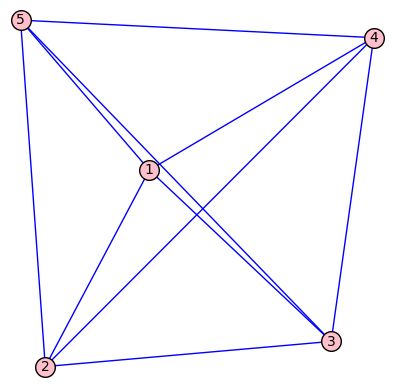

In [295]:
G1_1 = G_Ejemplos.transitive_closure()
G1_1.plot(vertex_color = 'pink', edge_color = 'blue')


**Ejemplo de transitividad local**

In [196]:
G_Ejemplos.clustering_coeff()

{1: 2/3, 2: 1/2, 3: 1, 4: 2/3, 5: 1}

**Ejemplo de reducción transitiva**

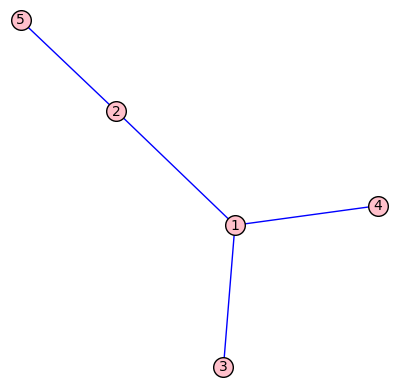

In [294]:
G4_1 = G_Ejemplos.transitive_reduction()
G4_1.plot(vertex_color = 'pink', edge_color = 'blue')

# 4) Euleriano / Hamiltoniano, Conectividades, Dominación.

Podemos decir que un grafo es **euleriano** cuando:

   - Encontramos un **recorrido euleriano**, es decir, un camino que no repite aristas.
   
   - Encontramos un **circuito euleriano**, es decir, un camino cerrado que no repite aristas.
   
  

Podemos decir que un grafo es **semieuleriano** cuando no admiten un circuito euleriano pero si un recorrido euleriano.

In [265]:
# Mostramos si el grafo es euleriano, o no.

G_Ejemplos.is_eulerian()

False

Vamos a recordar el **Teorema de Euler**:

   - Para que un grafo sea **euleriano**, todos los vértices deben tener valencia par.
    
   - Un grafo admite **recorrido euleriano** si y sólo si, todos tienen valencia par, excepto dos de ellos, siendo los vértices inicial y final del recorrido.

In [269]:
# Con la función G.degree() nos devuelve la lista de vértices con sus grados.

G_Ejemplos.degree(labels = True)

{1: 3, 2: 4, 3: 2, 4: 3, 5: 2}

Cuando un grafo es **euleriano**, la función *G.eulerian_circuit()* nos devuelve la lista
de aristas que tiene el circuito. En el caso de que el grafo sea **semieuleriano**,
añadimos el parámetro path = True.

In [271]:
G_Ejemplos.eulerian_circuit(path = True)

[(4, 5, None),
 (5, 2, None),
 (2, 4, None),
 (4, 1, None),
 (1, 3, None),
 (3, 2, None),
 (2, 1, None)]

Podemos decir que un grafo es **hamiltoniano** cuando:

   - Encontramos un **camino hamiltoniano**, es decir, un camino que no repite vértices, dando lugar a un grafo hamiltoniano.
   
   - Encontramos un **ciclo hamiltoniano**, es decir, un camino cerrado que no repite vértices, dando lugar a un grafo hamiltoniano.

In [273]:
# Mostramos si el grafo es hamiltoniano, o no.

G_Ejemplos.is_hamiltonian()

True

Vamos a recordar las condiciones necesarias para que un grafo sea **hamiltoniano**:
    
   - Grafo Conexo
    
   - Valencia Mínima superior a 1.
    
   - Ningún vértice de corte.
    
   - Eliminando un conjunto de corte formado por **e** elementos, no se producen más de e componentes conexas.

In [277]:
print(G_Ejemplos.is_connected())
print(G_Ejemplos.degree())
print(G_Ejemplos.vertex_connectivity())

True
[3, 4, 2, 3, 2]
2


La función *G.hamiltonian_cycle()* nos devuelve un ciclo hamiltoniano (si es hamiltoniano):

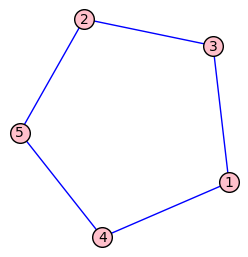

In [293]:
ciclo = G_Ejemplos.hamiltonian_cycle()

ciclo.plot(figsize = 4, vertex_color = 'pink', edge_color = 'blue')

La función *G.hamiltonian_path()* nos devuelve un camino hamiltoniano (si es semihamiltoniano)

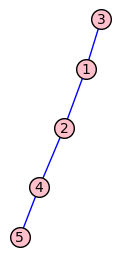

In [292]:
camino = G_Ejemplos.hamiltonian_path()

camino.plot(figsize = 4, vertex_color = 'pink', edge_color = 'blue')

De manera que hemos hablado sobre Euleriano y Hamiltoniano, cabe destacar la ***conectividad***, y de aquí, podemos sacar distintas métricas del grafo:
    
   - **Distancia**: Camino más corto entre dos vértices.
    
   - **Excentricidad**: Distancia de un vértice dado a otro más alejado.
        
   - **Radio**: Menor Excentricidad.
        
   - **Diámetro**: Mayor Excentricidad.
        
   - **Centro**: Vértices de excentricidad igual al radio.
        
   - **Periferia**: Vértices de excentricidad igual al diámetro.

In [289]:
# Calculamos las métricas sobre el grafo.

print("Distancia entre los vértices 1 y 5:", G_Ejemplos.distance(1,5))

print("Excentricidad:", G_Ejemplos.eccentricity())

print("Radio:", G_Ejemplos.radius())

print("Diámetro:", G_Ejemplos.diameter())

print("Centro:", G_Ejemplos.center())

print("Periferia:", G_Ejemplos.periphery())

Distancia entre los vértices 1 y 5: 2
Excentricidad: [2, 1, 2, 2, 2]
Radio: 1
Diámetro: 2
Centro: [2]
Periferia: [1, 3, 4, 5]


Por otra parte, hablamos sobre la **Centralidad de Katz**.

**La centralidad de Katz** calcula la influencia relativa de un nodo dentro de una red,
midiendo el número de vecinos inmediatos (nodos de primer grado) y también todos los demás nodos de la red que se conectan al nodo, en consideración a través de estos vecinos inmediatos. 
Sin embargo, las conexiones realizadas con vecinos distantes se ven penalizadas por un factor de atenuación: **Alpha**. 
A cada ruta o conexión entre un par de nodos se le asigna un peso determinado por **Alpha** y la distancia entre nodos como **Alpha ^ d**.

**Se calcula de la siguiente forma**:

   - Llamamos a la función **katz_centrality**, recibiendo por parámetro el *factor de penalización.*
   
   - De forma opcional, recibe por parámetro el vértice a medir, *u*.

In [291]:
CK = G_Ejemplos.katz_centrality(0.1)

print(CK)

{1: 0.426886792452830, 2: 0.544811320754717, 3: 0.297169811320755, 4: 0.426886792452830, 5: 0.297169811320755}


Finalmente, hablamos sobre la **dominación de un grafo**.

Un nodo 𝑑 domina un nodo 𝑛 si todos los caminos desde la raíz del nodo de entrada hasta 𝑛 deben pasar por 𝑑. El árbol
dominador de un nodo 𝑛 es el único nodo que domina estrictamente a 𝑛 pero no domina a ningún otro nodo
que domina 𝑛. 

**Un árbol dominador** es un árbol donde los hijos de cada nodo son aquellos nodos que inmediatamente
domina.

**Si el grafo es conexo y no dirigido**, el padre de un vértice 𝑣 es:

 - la raíz si 𝑣 está en la misma componente biconexa que la raíz.
 - el primer vértice cortado en un camino desde 𝑣 hasta la raíz.

**Si el grafo no es conexo**, el árbol dominador de todo el grafo es igual al árbol dominador de la
componente conexa de la raíz.

**Si el grafo es dirigido**, calcular un árbol dominador es más complicado y requiere tiempo 𝑂(𝑚 log 𝑚),
donde 𝑚 es el número de aristas.

Para el ejemplo, nuestro grafo se trata de un grafo **conexo y no dirigido**, llamamos a la función *dominator_tree()*,
que recibe como parámetro el vértice raíz.

{1: [3], 2: [3], 3: [1, 2, 4, 5], 4: [3], 5: [3]}


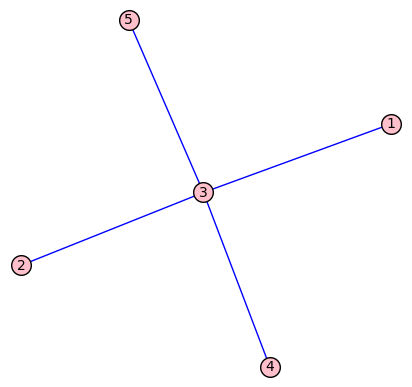

In [322]:
dominacion_ejemplo = G_Ejemplos.dominator_tree(3)

print(dominacion_ejemplo.to_dictionary())

dominacion_ejemplo.plot(vertex_color = 'pink', edge_color = 'blue')

<html>
    
   <h2><center>Ejercicios Finales: Estudio de red topológica</center></h2>
   
</html>

En esta parte de la práctica, vamos a trabajar los siguientes ejercicios sobre la **siguiente red topológica**. A continuación
se muestra la imagen correspondiente a ésta, y los ejercicios relacionados con la teoría dada anteriormente, además de proporcionar
el grafo principal de ésta red.

<img src = https://lucid.app/publicSegments/view/c442bac9-752a-4c4c-a810-09869ca47ed9/image.png>

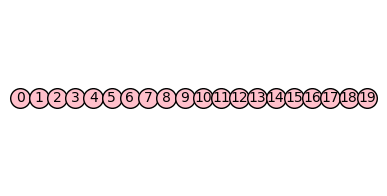

In [312]:
G = Graph({})

listaVertices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

for a in listaVertices:
    
  G.add_vertex(a)

G.show(vertex_color = 'pink')

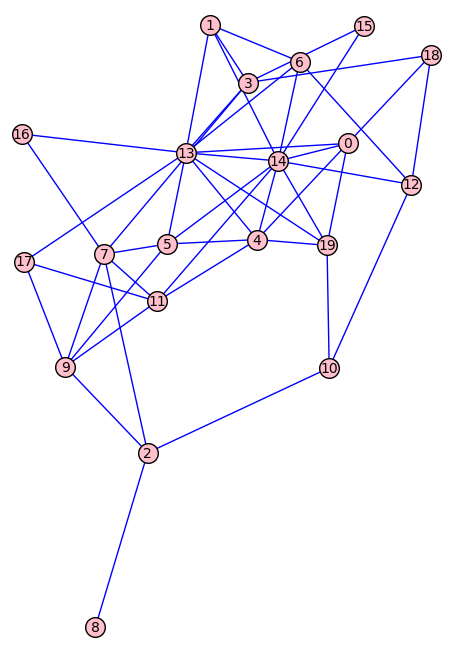

In [313]:
#Lista de vértices, y mostramos resultado final.

G = Graph(weighted = True)

listaAristas = [(0, 14, 3), (0, 19, 5), (0, 18,7), (0, 4,4), (0, 13,3),
                (1, 6, 8), (1, 14, 4), (1, 13, 5), (1, 3,6),
                (2, 8, 6), (2, 10, 5), (2, 9, 4), (2, 7, 7),
                (3, 1, 5), (3, 13, 7), (3, 15, 5), (3, 7, 6), (3, 18, 5),
                (4, 19, 7), (4, 5, 8), (4, 11, 5), (4, 13, 8), (4, 14, 3), (4, 0, 5),
                (5, 4, 8), (5, 14, 4), (5, 13, 7), (5, 7, 4), (5, 9, 6),
                (6, 12, 7), (6, 1, 5), (6, 14, 4), (6, 13, 8),
                (7, 5, 8), (7, 2, 5), (7, 16, 8), (7, 9, 7), (7, 3, 3), (7, 11, 5),
                (8, 2, 8),
                (9, 2, 5), (9, 5, 8), (9, 11, 4), (9, 7, 6), (9, 17, 7),
                (10, 12, 7), (10, 19, 5), (10, 2, 6),
                (11, 4, 4), (11, 14, 7), (11, 9, 8), (11, 7, 5), (11, 17, 6),
                (12, 18, 5), (12, 14, 6), (12, 10, 6), (12, 6, 8),
                (13, 0, 7), (13, 19, 4), (13, 4, 6), (13, 5, 7), (13, 17, 4), (13, 16, 6), (13, 3, 8), (13, 1, 5), (13, 6, 8),
                (14, 0, 6), (14, 19, 4), (14, 4, 8), (14, 5, 6), (14, 11, 5), (14, 13, 7), (14, 15, 4), (14, 6, 7),
                (15, 14, 5), (15, 3, 6),
                (16, 13, 7), (16, 7, 5),
                (17, 9, 5), (17, 11, 6), (17, 13, 6),
                (18, 12, 6), (18, 0, 7), (18, 3, 5),
                (19, 10, 4), (19, 4, 7), (19, 13, 8), (19, 14, 6), (19, 0, 9)]

for a in listaAristas:
    
  G.add_edge(a)


G.show(figsize = 10, vertex_color = 'pink', edge_color = 'blue')

<html>
    
   <h3><center>Ejercicio 1</center></h3>
   
</html>

En la representación de redes multicast y para calcular valores de tranporte de datos o montaje de las mismas podemos usar 2 algoritmos de la teoría de grafos para saber por qué enlaces va a llegar la información de manera que sean los más cortos desde un nodo emisor a los demás routers (kruskal) o si envío un mensaje desde un nodo emisor a uno receptor, cuáles son los enlaces más cortos por los que pasa para que llegue la información (Dijkstra).

El objetivo principal de este ejercicio es estudiar el comportamiento del algoritmo para la transmisión de información en redes multicast, es decir, a través del algoritmo consguiremos construir una red de routers repartidos de manera que se utilice la menor cantidad posible de clables entre los nodos.

Para ello va a ser necesario calcular el camino más corto que une cualquier par de nodos de la red, así como el coste de la trasnmisión. Para ello se ha de ejecutar el algoritmo consecutivamente tomando en cada caso, como nodo de origen, cada uno de los nodos del grafo.

Se pide:

a) **Determinar un esquema que utilice el menor número de enlaces posibles y la menor distancia de manera que podamos enviar un mensaje desde el router 1 al resto de routers, para poder formar nuestra red con la menor cantidad de cable posible.**

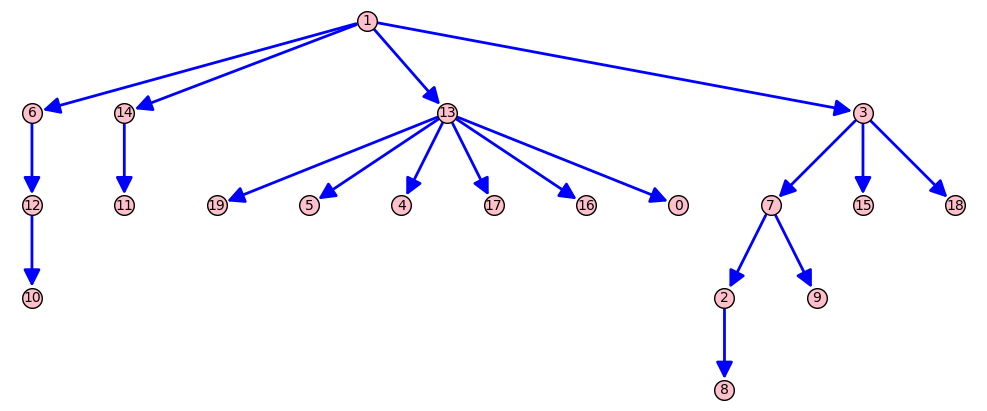

In [254]:
#Lo hacemos dirigido y mostramos el grafo convertido a árbol, partiendo del vértice 1:

GA = G.to_directed()

(BFS, lista) = arbol_bfs(GA, 1)

BFS.plot(figsize = 10, vertex_color = 'pink', edge_color = 'blue', layout='tree')

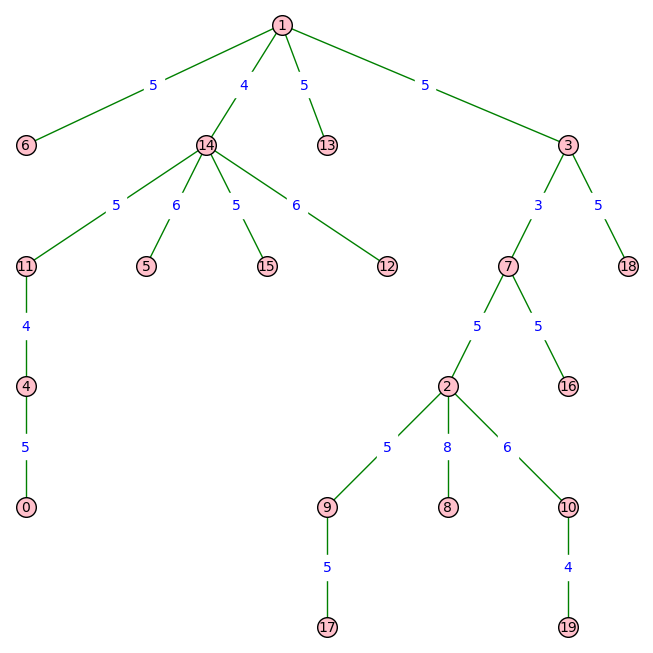

In [256]:
#Aplicamos el algoritmo de Kruskal

(K,p) = Kruskal(GA)

K.plot(layout='tree', vertex_color = 'pink', edge_color = 'green', edge_labels=True, figsize=10)

b) **Determinar un camino por los enlaces más cortos de manera que podamos enviar un mensaje desde el router 8 hasta el router 15.**

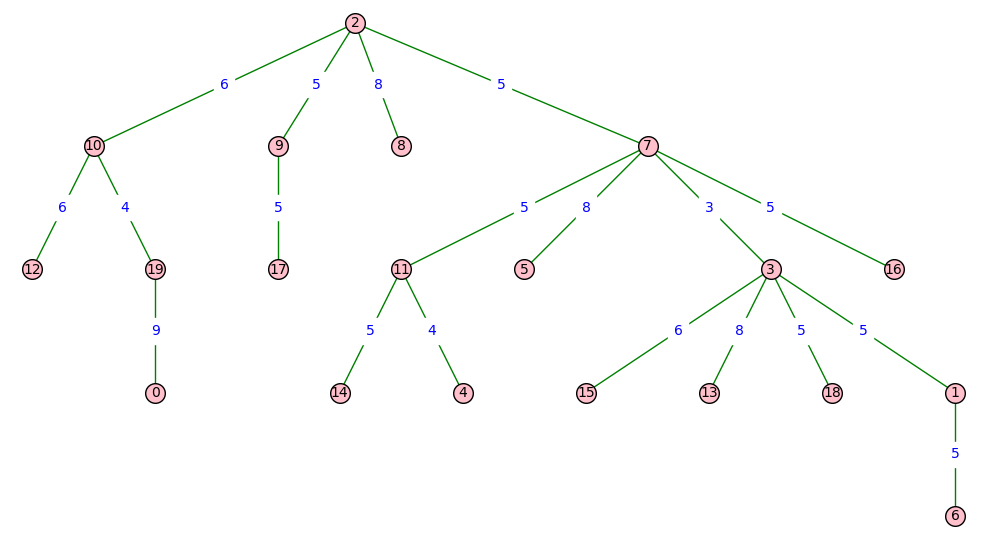

El camino más corto para ir del router 8 al router 15 es:  [[8, 2, 7, 3, 15]]


In [304]:
#Aplicamos el algoritmo de Dijkstra del arbol generado anteriormente.

(D, DJ) = Djkstra(GA,8)

DJ.show(layout='tree', edge_labels=True, figsize=10, vertex_color = 'pink', edge_color = 'green')

print("El camino más corto para ir del router 8 al router 15 es: ", DJ.all_paths(8, 15))

**c) Supongamos que deseamos dividir nuestra gran red en dos subredes con el mismo o casi mismo número de dispositivos en cada una de las subredes de manera que la cantidad de enlaces de un lado a otro de la subred sea el mínimo posible, ¿es esto posible?**

La respuesta es sí, para ello utilizamos la técnica de la bisección. A continuación se importa la librería networkx y el código del algoritmo necesario:

In [206]:
import networkx

In [207]:
# Cálculo de la conectividad algebraica de todo el grafo:

L2 = {i: GA.neighbors(i) for i in GA}

GA = networkx.Graph(L2)

conect = networkx.algebraic_connectivity(GA, method='tracemin_lu' ) #conectividad entre todos los vecinos

In [209]:
# Ahora, el autovector asociado

V = networkx.fiedler_vector(GA, weight='weight', normalized=False, tol=1e-08, method='tracemin_pcg', seed=None)

In [210]:
# Para el siguiente paso necesitamos el algoritmo de Kernighan-Lin
from itertools import count

import networkx as nx
from networkx.algorithms.community.community_utils import is_partition
from networkx.utils import BinaryHeap, not_implemented_for, py_random_state

__all__ = ["kernighan_lin_bisection"]


def _kernighan_lin_sweep(edges, side):
    """
    This is a modified form of Kernighan-Lin, which moves single nodes at a
    time, alternating between sides to keep the bisection balanced.  We keep
    two min-heaps of swap costs to make optimal-next-move selection fast.
    """
    costs0, costs1 = costs = BinaryHeap(), BinaryHeap()
    for u, side_u, edges_u in zip(count(), side, edges):
        cost_u = sum(w if side[v] else -w for v, w in edges_u)
        costs[side_u].insert(u, cost_u if side_u else -cost_u)

    def _update_costs(costs_x, x):
        for y, w in edges[x]:
            costs_y = costs[side[y]]
            cost_y = costs_y.get(y)
            if cost_y is not None:
                cost_y += 2 * (-w if costs_x is costs_y else w)
                costs_y.insert(y, cost_y, True)

    i = 0
    totcost = 0
    while costs0 and costs1:
        u, cost_u = costs0.pop()
        _update_costs(costs0, u)
        v, cost_v = costs1.pop()
        _update_costs(costs1, v)
        totcost += cost_u + cost_v
        i += 1
        yield totcost, i, (u, v)

In [211]:
# Parte del algoritmo donde calculamos la bisección
@py_random_state(4)
@not_implemented_for("directed")
def kernighan_lin_bisection(GA, partition=None, max_iter=10, weight="weight", seed=None):
    n = len(GA)
    labels = list(GA)
    seed.shuffle(labels)
    index = {v: i for i, v in enumerate(labels)}

    if partition is None:
        side = [0] * (n // 2) + [1] * ((n + 1) // 2)
    else:
        try:
            A, B = partition
        except (TypeError, ValueError) as err:
            raise nx.NetworkXError("partition must be two sets") from err
        if not is_partition(GA, (A, B)):
            raise nx.NetworkXError("partition invalid")
        side = [0] * n
        for a in A:
            side[index[a]] = 1

    if GA.is_multigraph():
        edges = [
            [
                (index[u], sum(e.get(weight, 1) for e in d.values()))
                for u, d in GA[v].items()
            ]
            for v in labels
        ]
    else:
        edges = [
            [(index[u], e.get(weight, 1)) for u, e in GA[v].items()] for v in labels
        ]

    for i in range(max_iter):
        costs = list(_kernighan_lin_sweep(edges, side))
        min_cost, min_i, _ = min(costs)
        if min_cost >= 0:
            break

        for _, _, (u, v) in costs[:min_i]:
            side[u] = 1
            side[v] = 0

    A = {u for u, s in zip(labels, side) if s == 0}
    B = {u for u, s in zip(labels, side) if s == 1}
    return A, B

In [212]:
# Por último, llamada al método de la bisección

Bi = kernighan_lin_bisection(GA, partition = None, max_iter = 100, weight = None, seed = None)

In [213]:
print("Podemos dividir nuestra red en los conjuntos de las siguientes 2 subredes:")
show(Bi)

Podemos dividir nuestra red en los conjuntos de las siguientes 2 subredes:


({2, 3, 5, 7, 8, 9, 11, 15, 16, 17}, {0, 1, 4, 6, 10, 12, 13, 14, 18, 19})

<html>
    
   <h3><center>Ejercicio 2</center></h3>
   
</html>

In [324]:
print("Librerias Importadas")

import matplotlib
import random

def getListaColores(n):
    colors=[]
    for name, hex in matplotlib.colors.cnames.items():
        colors.append(name)
    return sample(colors, n)

Librerias Importadas


A partir del grafo principal, responda a las siguientes preguntas:

**a) Compruebe si G es bipartito con coloración.**

Un gráfico bipartito es posible si la coloración del gráfico es posible utilizando dos colores, de modo que los vértices de un conjunto estén coloreados con el mismo color.

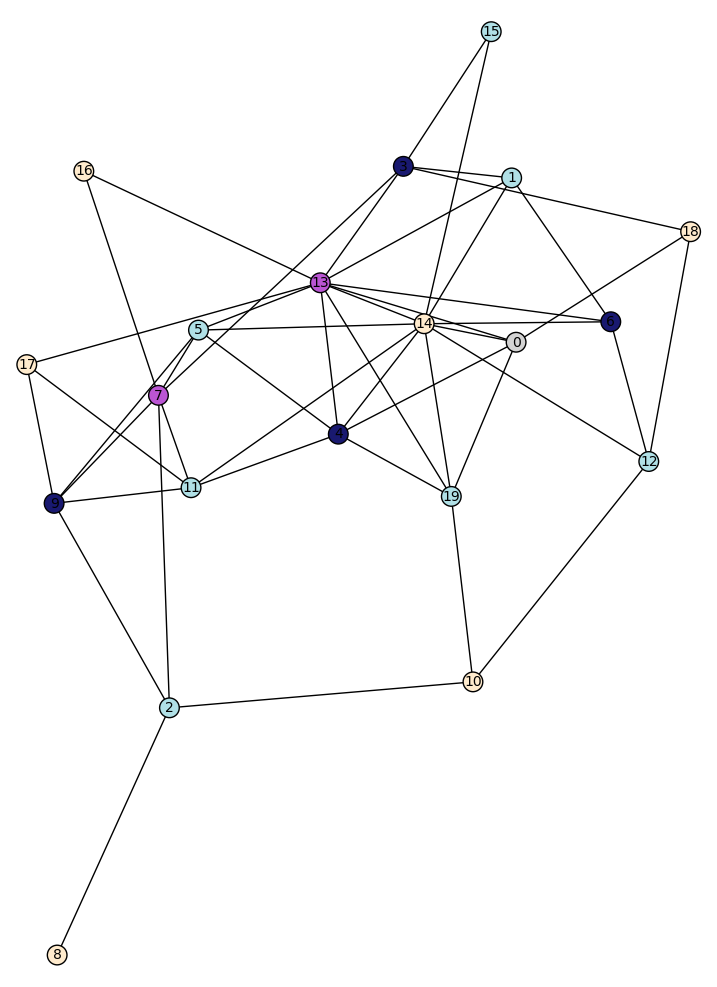

In [216]:
d = {}

vc = G.coloring()

colors = getListaColores(len(vc))

for c,l in zip(colors,vc):
    
    d[c]=l
    
G.show(vertex_colors = d, figsize = 15)

In [217]:
#Con método predefinido

G.is_bipartite()

False

In [218]:
if len(G.coloring()) > 2:
    
    print(false)
    
else:
    print(true)

False


**b) Sacar de G el subconjunto más grande de vértices que tengan aristas de 2 o más colores**

*- Nota*: Se proporciona el grafo del apartado y la matriz de adyacencia

<img src=https://graphonline.ru/tmp/saved/cm/cmlFjineXmSVDhhE.png>

In [220]:
C=[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], 
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], 
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], 
[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], 
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], 
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], 
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 
[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], 
[1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], 
[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]] 

#Para cada vértices miramos los colores de las aristas que tienen conectadas. Si sólo hay un color, desconectamos el vértice.
#Devolvemos el número de vértices restantes tras recorrerlos todos.

def subsetGraph(C):
    
    vertices = set()
    for i in range(len(C)):
        vertices.add(i)
    
    for v in C:
        l=[]
        for a in v:
            if a != 0:
                l.append(a)
        if len(set(l)) <= 1:
            vertices.remove(C.index(v))
    return vertices

print("Número de vértices que quedan: ", len(subsetGraph(C)))
print("Vértices que quedan: ", subsetGraph(C))

Número de vértices que quedan:  1
Vértices que quedan:  {2}


<html>
    
   <h3><center>Ejercicio 3</center></h3>
   
</html>

Sea ***G*** el grafo cuyo conjunto de vértices son los routers de una red y en el que dos vértices son adyacentes si corresponden a routers conectados entre sí.

**a) Dibuja la clausura transitiva del grafo G**

In [319]:
G2 = G.transitive_closure().edges(sort = True, labels = False)

print(G2)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 8), (7, 9), (7, 10), (7, 11),

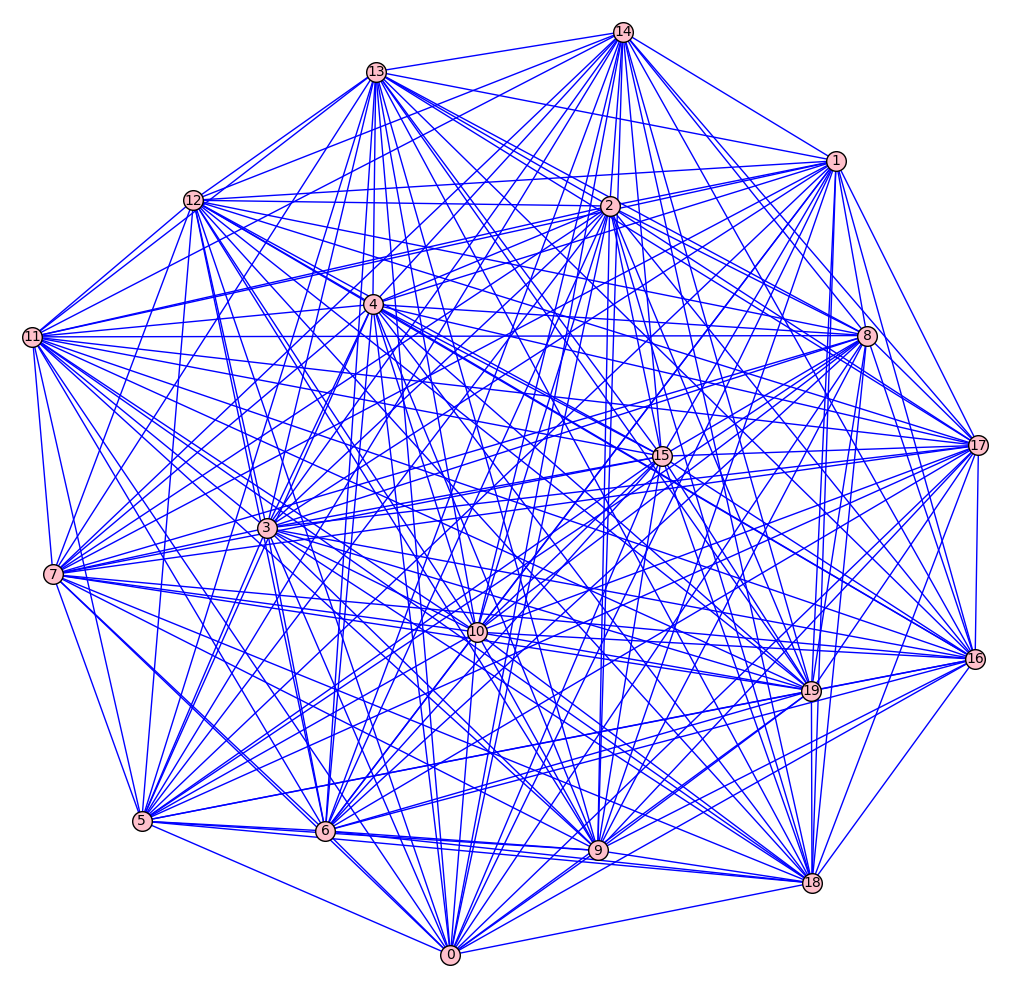

In [226]:
G3 = G.transitive_closure()

G3.show(figsize = 15, vertex_color = 'pink', edge_color = 'blue')

**b) Calcula el coeficiente de agrupamiento local para cada vértice de *G*.**

In [228]:
print("Coeficientes de agrupamientos locales: ", G.clustering_coeff())

Coeficientes de agrupamientos locales:  {14: 13/45, 19: 3/5, 18: 0, 13: 4/15, 1: 2/3, 6: 2/3, 3: 1/10, 2: 1/6, 8: 0, 10: 0, 9: 2/5, 7: 1/5, 5: 2/5, 11: 3/10, 12: 1/6, 16: 0, 17: 1/3, 0: 3/5, 4: 3/5, 15: 0}


**c) ¿Cual sería el vértice "influencer"?**

Si recordamos la teoría, para un vértice es bueno tener poca transtividad local, y esto es lo que lo convierte en influencer.Por lo que buscaremos en el apartado anterior el vértice con menos transitividad local. Por lo que los vértices influencers son el 8,10,15,16 y 18.

**d) Dibuja la reducción transitiva de *G***

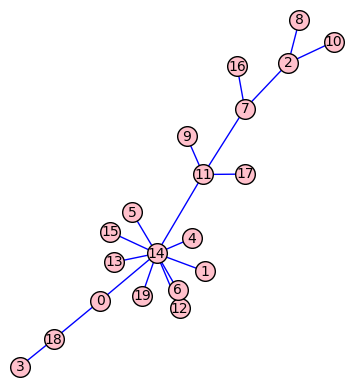

In [257]:
G4 = G.transitive_reduction()

G4.plot(vertex_color = 'pink', edge_color = 'blue')

<html>
    
   <h3><center>Ejercicio 4</center></h3>
   
</html>

Dado el grafo ***G***, donde los vértices son dispositivos y aristas la conexión entre ellas:

**a) Responda a las siguientes cuestiones. Si obtiene False en la pregunta, soluciónelo si es posible para que no lo sean.**

- Dado el grafo G, *¿es Euleriano?*



In [233]:
#Comprobamos si es Euleriano.

G.is_eulerian(path = True)

False

In [234]:
#Como obtenemos False, debemos de solucionarlo, por lo que primero veremos la lista de grados.

G.degree(labels = True)

{14: 10,
 19: 5,
 18: 3,
 13: 10,
 1: 4,
 6: 4,
 3: 5,
 2: 4,
 8: 1,
 10: 3,
 9: 5,
 7: 6,
 5: 5,
 11: 5,
 12: 4,
 16: 2,
 17: 3,
 0: 5,
 4: 6,
 15: 2}

In [235]:
#Comprobamos además si se puede construir un circuito euleriano.

G.eulerian_circuit()

False

In [236]:
#La condición nos dice que solo puede ser euleriano si todas sus valencias son pares.

#Por lo que debemos añadir aristas entre las valencias impares para que sean pares, y obtenemos el circuito.

H = copy(G)

H.allow_multiple_edges(True)

H.add_edges([(0, 3), (5, 8), (9, 10), (11, 17), (18, 19)])

H.eulerian_circuit()

[(14, 15, 5),
 (15, 3, 6),
 (3, 0, None),
 (0, 4, 5),
 (4, 11, 4),
 (11, 9, 8),
 (9, 5, 8),
 (5, 4, 8),
 (4, 13, 6),
 (13, 0, 7),
 (0, 19, 9),
 (19, 4, 7),
 (4, 14, 8),
 (14, 0, 6),
 (0, 18, 7),
 (18, 12, 6),
 (12, 10, 6),
 (10, 9, None),
 (9, 7, 6),
 (7, 11, 5),
 (11, 17, 6),
 (17, 9, 5),
 (9, 2, 5),
 (2, 7, 5),
 (7, 5, 8),
 (5, 13, 7),
 (13, 1, 5),
 (1, 3, 5),
 (3, 7, 3),
 (7, 16, 5),
 (16, 13, 7),
 (13, 17, 6),
 (17, 11, None),
 (11, 14, 5),
 (14, 12, 6),
 (12, 6, 8),
 (6, 1, 5),
 (1, 14, 4),
 (14, 5, 6),
 (5, 8, None),
 (8, 2, 8),
 (2, 10, 6),
 (10, 19, 4),
 (19, 13, 8),
 (13, 3, 8),
 (3, 18, 5),
 (18, 19, None),
 (19, 14, 6),
 (14, 13, 7),
 (13, 6, 8),
 (6, 14, 7)]

- Dado el grafo G, *¿es Hamiltoniano?*

In [237]:
print("¿Es hamiltoniano el grafo G?: ", G.is_hamiltonian())

¿Es hamiltoniano el grafo G?:  False


- Determine el camino de ***máxima longitud*** del grafo G.

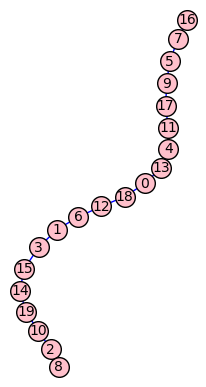

In [258]:
c = G.longest_path()

c.plot(vertex_color = 'pink', edge_color = 'blue')

**b) Dado el grafo G:**

- Determine la **matriz de centralidad de Katz** sobre el grafo G.

In [323]:
#Centralidad de Katz

T = G.katz_matrix(0.1, True)

print(T)

[   0.000000000000000   0.0451325932965099  0.00533378476295553   0.0383982729485090    0.000000000000000   0.0571389906523183   0.0449696422404955   0.0176690350592210 0.000533378476295553   0.0145243393347600   0.0206110947592788   0.0412108955188365   0.0366058113323502    0.000000000000000    0.000000000000000   0.0223184652035517   0.0200840673748308   0.0238906873542684    0.000000000000000    0.000000000000000]
[  0.0451325932965100    0.000000000000000  0.00440645254340813    0.000000000000000   0.0495238175811291   0.0421810396810790    0.000000000000000   0.0235800111628339 0.000440645254340813   0.0118350328909739  0.00820883612593270   0.0270793294399070   0.0337082304979764    0.000000000000000    0.000000000000000   0.0295479132788886   0.0195700609657065   0.0211034960825112   0.0209569019901751   0.0439736782179425]
[ 0.00533378476295553  0.00440645254340813    0.000000000000000   0.0148668838544140   0.0102634564547111   0.0285559985570537  0.00421250776543208    0.000

- Determine, a partir de la centralidad de Katz resuelta en el apartado anterior, el ***máximo grado de influencia.***

In [245]:
T1 = max(T)

show(T1) #El router más influido es el 6.

(0.0571389906523183, 0.0421810396810790, 0.0285559985570537, 0.0383626338582587, 0.000000000000000, 0.000000000000000, 0.0408303946158040, 0.000000000000000, 0.00285559985570537, 0.000000000000000, 0.0109110558218402, 0.0639992736294469, 0.0235055381402341, 0.000000000000000, 0.000000000000000, 0.0209775848557874, 0.0308566997780640, 0.0369633913016021, 0.0119007162650811, 0.0570490215211146)

**c) Dada la matriz M de 5 dispositivos, donde la fila i representa el dispositivo y la columna j el tráfico recibido / enviado:**

In [246]:
M = matrix([[0, 14, 3, 1, 19, 5, 2], # ---> Router 1
           [3, 5, 1, 0, 4, 10, 800], # ---> Router 3
           [3, 1, 155, 43, 2, 1, 6], # ----> Router 5
           [1, 5, 1, 1, 7, 0, 10], # ---> Switch 11
           [2, 10, 8, 3, 113, 11, 48]]) # ---> Router 19

show(M)

[  0  14   3   1  19   5   2]
[  3   5   1   0   4  10 800]
[  3   1 155  43   2   1   6]
[  1   5   1   1   7   0  10]
[  2  10   8   3 113  11  48]

- **Transforme la matriz en un grafo**. Comprobará que aparece *bucles o lazos*, esto se debe a que sucesivas veces se reenvía el tráfico por el mismo dispositivo.

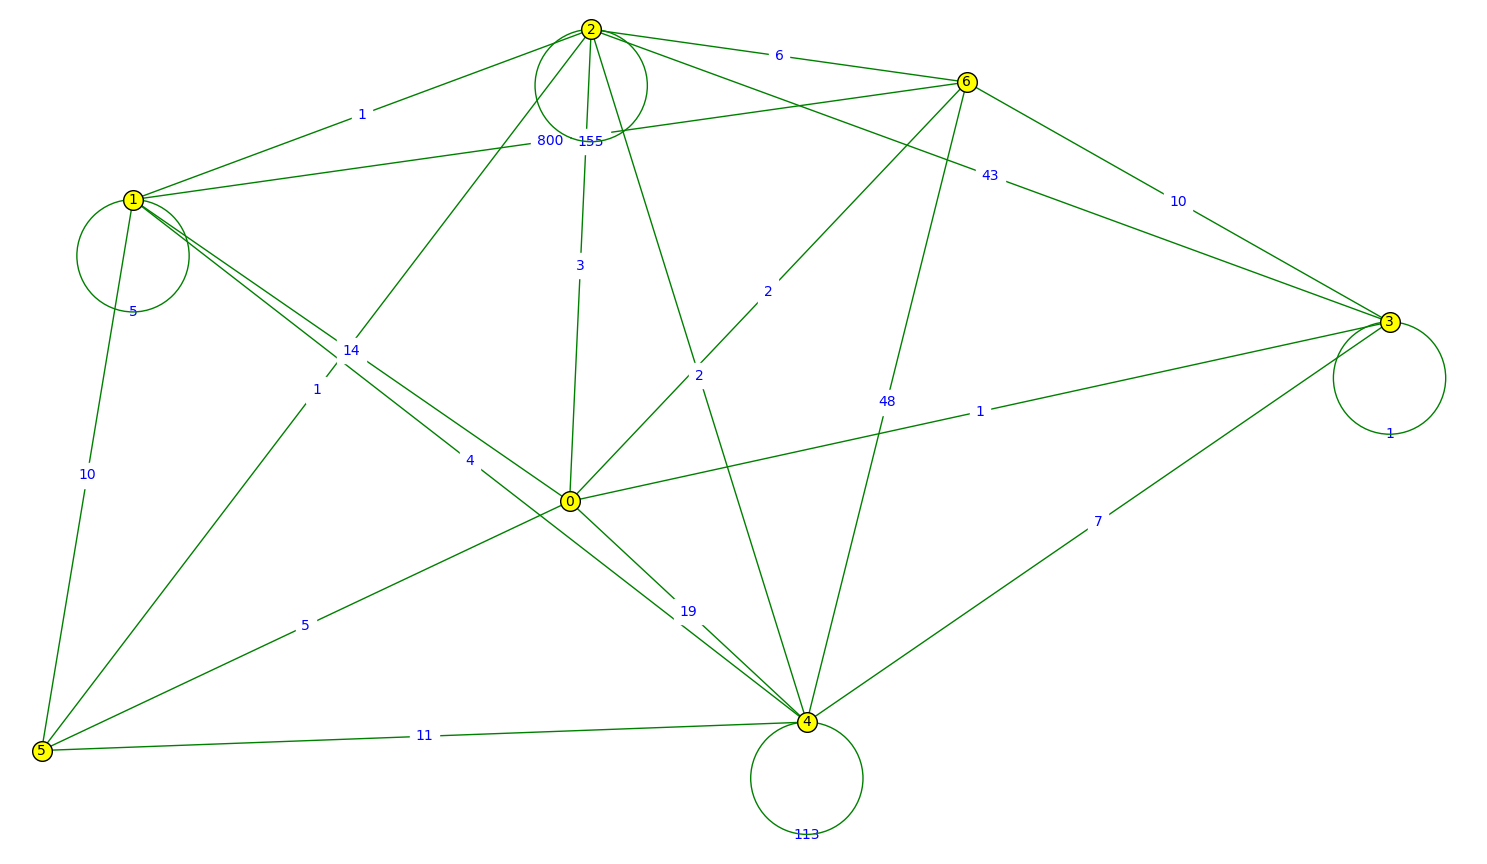

In [147]:
g = Graph(M, format='weighted_adjacency_matrix');

g.show(edge_labels = True, vertex_color = 'yellow', edge_color = 'green', figsize = 15) 

- **Calcula la mayor distancia entre dispositivos que se recibe el tráfico.**

In [247]:
#Comprobamos que el grafo es conexo.

g.is_connected()

True

In [248]:
#Una vez que el grafo es conexo, podemos obtener las excentricidades de los vértices.

excentricidad = g.eccentricity()

print("Las excentricidades del grafo son: ", excentricidad)

#Luego, mostraremos el diámetro, ya que el diámetro es la mayor excentricidad del grafo.

diametro = G.diameter()

print("El diámetro del grafo es: ", diametro)

Las excentricidades del grafo son:  [1, 2, 1, 2, 1, 2, 2]
El diámetro del grafo es:  4


- **Calcula el tráfico medio del grafo *g*.**

In [249]:
import numpy as np

In [250]:
media = np.array(M)

a = media.mean()

print(a)

37.08571428571429


- **Calcula la dominación sobre el Router 8 y el servidor FTP del grafo original.**

{14: [2], 19: [2], 18: [2], 13: [2], 1: [2], 3: [2], 10: [2], 9: [2], 7: [2], 5: [2], 11: [2], 12: [2], 0: [2], 4: [2], 15: [2], 2: [14, 16, 19, 17, 4, 18, 15, 13, 1, 6, 3, 8, 10, 9, 7, 5, 11, 12, 0], 6: [2], 8: [2], 16: [2], 17: [2]}


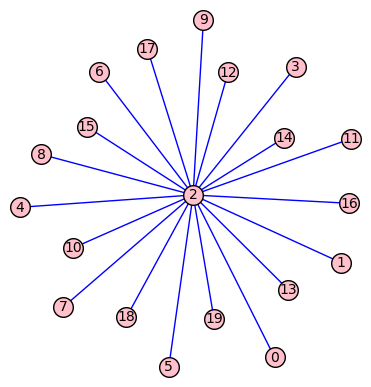

In [316]:
dominacion = G.dominator_tree(8)

print(dominacion.to_dictionary())

dominacion.plot(vertex_color = 'pink', edge_color = 'blue')

{17: [16, 14, 0, 19, 4, 18, 15, 13, 1, 6, 3, 2, 10, 9, 7, 5, 11, 12], 14: [17], 19: [17], 18: [17], 13: [17], 1: [17], 3: [17], 2: [17, 8], 8: [2], 9: [17], 7: [17], 5: [17], 11: [17], 12: [17], 0: [17], 4: [17], 15: [17], 6: [17], 10: [17], 16: [17]}


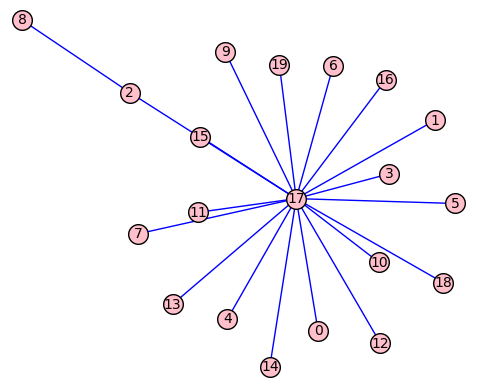

In [317]:
dominacion1 = G.dominator_tree(17)

print(dominacion1.to_dictionary())

dominacion1.plot(vertex_color = 'pink', edge_color = 'blue')